# Fitting Data with Outliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/dataPoly.xlsx", sheet_name='data')
data_train = pd.read_excel("./data/dataPoly.xlsx", sheet_name='dataTrain')
data_test = pd.read_excel("./data/dataPoly.xlsx", sheet_name='dataTest')
data.head()

,x,y
0,0.0108,4.9405
1,0.0693,4.7366
2,0.0201,4.9260
3,0.1152,4.6578
4,0.1370,4.5140


Fit a model and evaluate at test values.

In [3]:
regressor = GaussianProcessRegressor()
regressor.fit(data_train.x.to_frame(), data_train.y)

y_pred = regressor.predict(data_test.x.to_frame())
print("R^2 =", regressor.score(data_test.x.to_frame(), data_test.y))
print("MSE =", mean_squared_error(data_test.y, y_pred))

R^2 = 0.5786390710659199
MSE = 23.54004422518358


Compute prediction intervals.

In [4]:
sum_of_squares = np.sum((data_train.y - regressor.predict(data_train.x.to_frame()))**2)
std = np.sqrt(1 / (len(data_train.y) - 2) * sum_of_squares)
y_err = std * 1.96
y_pred_PI = np.concatenate((y_pred + y_err, y_pred - y_err)).reshape((-1, 2), order='F')

Plot the results.

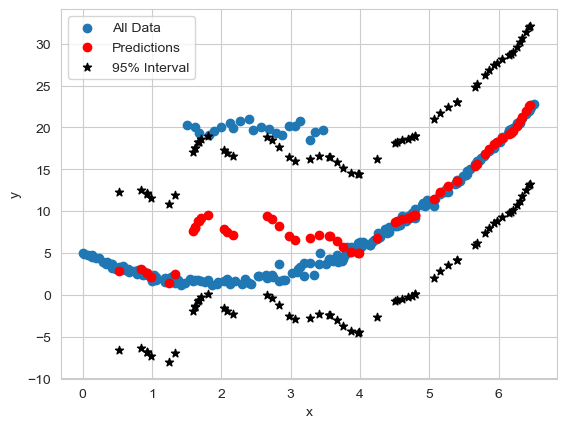

In [5]:
plt.figure()
plt.scatter(data.x, data.y)
plt.scatter(data_test.x, y_pred, color='red')
plt.scatter(data_test.x, y_pred_PI[:, 0], marker='*', color='black')
plt.scatter(data_test.x, y_pred_PI[:, 1], marker='*', color='black')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["All Data", "Predictions", "95% Interval"])
plt.show()